Please fill in your name and that of your teammate.

You: Albin Aliu

Teammate: (Christoph Jutzet)

# Introduction

Welcome to the eighth lab. Today we have _way too many_ topics to cover to do everything by hand as usual, so I selected different depths to each topic to make sure you gain full insight and applicable experience.

As you go through the exercise and you apply algorithm after algorithm, method after method, I want you to think about the actual **competence** you are accumulating over the months, both theoretical and applied. Think about it, and be confident: covering so many, so different algorithms in a single lab may sound like a challenge to the version of Past You from barely two months ago, but I believe Today's You is capable of taking on this whale of a lab and have space for more.

Working with many algorithms gives me another chance to shake you out of your confidence zone with respect to _data processing_ . Basically each algorithm requires different formats, so you cannot just define the data on top and keep reusing it: you will need to re-load the dataset for each exercise, applying a different processing each time.
Be flexible, and don't forget your train-test splits (and their correct usage) -- I should not need to mention it anymore, right? :)

Good luck, have fun!

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Fundamentals

#### 1.1 **[1pt]** Write an example (in English) of a Machine Learning application for which the Supervised Learning paradigm is not (directly) applicable.

Autonomous Driving: there are multiple correct "outputs" for every input and building a dataset of correct reactions is unfeasible for a single driver.

#### 1.2 **[1pt]** Write an example (in English) of a Machine Learning application for which the Unsupervised Learning paradigm is an ideal choice.

Image Segmentation: by finding certain groups of pixels in an image with similar colors and within a minimal distance from each other, it is possible to extract shapes and build masks. 

# 2. Clustering

#### 2.1 **[2pt]** Explain the $k$-means algorithm using a few words of your own. Particularly, state any requirements, and what the user needs to define.

- To use "your own words", a trick is to read the slide, decide which things you need to mention, then close the slide and imagine a friend with only basic technical background in front of you. Now tell this person the things that you decided to mention.
- No need to go crazy. This is a type of (vague!) question that you will need to answer over and over, typically to convince your boss to let you use a particular method, or to guide someone with less knowledge in the field. It's not a right/wrong question: you need to show that you have competence, list the key points, be brief and to the point.
- And of course, copy+paste+change words from the slide will score you 0 points :) while a sincere, fair try that is not wrong will pass, so no worries.

You define the hyperparameter $k$, which controls the numbers of clusters in which you want to split the data. So, you have now k points (which can be arbitrarily initialized or there are optimal algorithms for it) and you move them around based on the inputs you have. Also, you need to have some kind of similarity measure. Then, for every input you compute the similarity to one of our points and take that point which is closest to our input. Update this point accoridng to a learning rate $\eta$.

For the next question, we need to understand how to evaluate a clustering algorithm. The main difference between clustering and classification is that, well, it's UL not SL: the labels are not involved in the training, and they should not be involved in the testing. So how do you test the performance of a clustering algorithm?

Each mean/cluster gets a numerical identifier, the only problem is that the number does not correspond to our labels because it's assigned randomly based on initialization. The most naïve way then is to bruteforce all mappings between the labels and the cluster numbers: the one that makes the most sense is the intended one. Since this is orthogonal to the lecture and may take a long time to debug, here is a snippet of code that does that.

Read it, understand it, play with it, and possibly improve it. Bruteforcing is rarely optimal, which is the very reason why ML exists :)
(note: it may be easier to understand it if you first go ahead with answering the next question first, then come back to this)

In [12]:
# Load libs & config
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")
df = sns.load_dataset('iris')

# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2) # 80-20 split


In [13]:
# Goal: convert the labels to the cluster numbers generated by k-means
import itertools
species_names = sns.load_dataset('iris').species.unique()
possible_codes = itertools.permutations(range(len(species_names)))
converters = [dict(zip(species_names, perm)) for perm in possible_codes]
# try printing each of these variables and understand what they do

def cluster_to_class(model, fn_that_counts_misclassified, x_test, y_test):
    min_score = np.Infinity # we saw how to write a minimizer already right?
    right_conversion = None
    for converter in converters:
        conv_y_test = y_test.replace(converter) # conveniently works with `dict`s
        misclassified = fn_that_counts_misclassified(model, x_test, conv_y_test)
        if misclassified < min_score:
            min_score = misclassified
            right_conversion = converter
    return right_conversion

## to use this function, you will need something like this
# right_conversion = cluster_to_class(k_means_model, my_misclass_fn, x_test, y_test)
# conv_y_test = y_test.replace(right_conversion)
# k_means_misclassified = my_misclass_fn(k_means_model, x_test, conv_y_test)

#### 2.2 **[3pt]** Apply the scikit-learn implementation of the $k$-means algorithm to the Iris dataset (4 features, but drop the labels for training), and print a performance score of your choice.

- Of course you want to pass $k=3$.
- Passing the trained `KMeans` object to `print()` shows several useful parameters and their default values.
- After you get it to work though, why don't you try $k=2$ or $k=4$ and see what happens when you have to _guess_ $k$ (which is the normal case in real applications).
- For the performance score, remember this is [clustering, not classification](https://stackoverflow.com/a/48617825/6392246), which means `score()` will ignore the labels and print "strange numbers". No worries, you know how to make your own scoring from the past labs, right?
- Notice how $k$-means is _very_ sensitive to initialization. To get a consistently better result you may want to explore options `max_iter`, `n_jobs` and of course `init`.

In [17]:
x_train = train.iloc[:,:-1]

x_test = test.iloc[:,:-1]
y_test = test['species']

from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters=k, random_state=0).fit(x_train)


def my_score(model, x_test, y_test):
  predictions = model.predict(x_test)
  misclassified = (y_test != predictions).sum()
  print(f"misclassified: {misclassified}/{len(predictions)} ({misclassified/len(predictions)})")
  return misclassified

right_conversion = cluster_to_class(kmeans, my_score, x_test, y_test)
conv_y_test = y_test.replace(right_conversion)

missclassified = my_score(kmeans, x_test, conv_y_test)

missclassified

misclassified: 23/30 (0.7666666666666667)
misclassified: 30/30 (1.0)
misclassified: 2/30 (0.06666666666666667)
misclassified: 17/30 (0.5666666666666667)
misclassified: 20/30 (0.6666666666666666)
misclassified: 28/30 (0.9333333333333333)
misclassified: 2/30 (0.06666666666666667)


2

#### 2.3 **[1pt]** Plot the centroids learned with $k$-means on top of the data.

- To get the centroids coordinates, access attribute `cluster_centers_` of the KMeans object. Here are some options I passed to `scatterplot` for visibility (remember you can use the [double-splat](https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters) to transform the dict into keyword parameters):
```python
kwargs = {'marker':'X', 'color':'r', 's':200, 'label':'centroids'}
```
- The question does not specify the details of what to plot, so it's up to you to provide a correct and useful interpretation. You learned how to make useful plots, just be confident.
- The simplest is of course to reproduce what we saw so far: one plot, `petal_width` vs. `petal_length`. As they are the last two features, make sure to pick the corresponding coordinates from the centroids. Remember your ranges and your `transpose()` ;) 
- Even fancier: why not converting it to a DataFrame? Remember to drop the `species` column when constructing the `df`, as the centroids (learned with UL) have no species information (and thus one less column than iris): `columns=iris.columns.drop('species')`
- After answering correctly, if you want to learn something useful and fancy, try plotting a [[PairGrid]](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) that mimics a PairPlot but with added clusters off-diagonal. If you want the usual distributions on the diagonal, it is time to learn it is done with _Density Estimation_ (which is what you learned to do for Gaussians in NB), automated in Seaborn with `kdeplot()`.

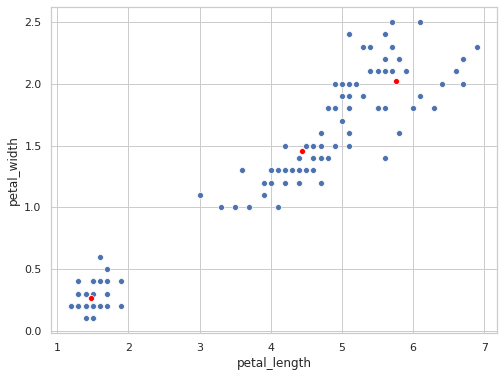

In [19]:
x = train['petal_length']
y = train['petal_width']
sns.scatterplot(x, y)

dfcentorid = pd.DataFrame(kmeans.cluster_centers_[:, [-2, -1]], columns=['petal_length', 'petal_width'])
sns.scatterplot(dfcentorid['petal_length'], dfcentorid['petal_width'], color = 'red')


Note: this is very basic, while a decent knowledge of $k$-means can typically be useful, as it cements the definition of clustering, centroid, expectation maximization, and the difference between clustering and classification. I strongly suggest you have a look at [[this very complete tutorial]](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

#### 2.4 **[2pt]** Train a scikit-learn OneClassSVM on the _versicolor_ class of the Iris dataset, and print the number of missed outliers.

- Careful with the input: you need to train this SVM only on the subset of the train data where the species is `versicolor`. That's "one-class". The training should not have access to data from the other two species.
- Also remember to drop the species column (as always) after selecting the lines with `versicolor`.
- The test inputs should work as expected, but the test labels should be converted so that `versicolor` is `1` and the others are `-1` (because those are the model outputs for "normal" and "outlier").
- Again, to compute the missed outliers, you cannot use `score()` or `plot_confusion_matrix()` because technically it's not a classifier. But you already made a function of the scoring code for the previous question right?

In [20]:
df_3 = df

# get all indices where species has labele versicolor.
indices = df_3.loc[df_3['species'] == 'versicolor', 'species'].index

# reduce dataframe
df_3 = df_3.loc[indices]

# drop species
dfnl_3 = df_3.iloc[:,:-1]

# split agian
train_3, test_3 = train_test_split(dfnl_3, test_size=0.2) # 80-20 split


from sklearn.svm import OneClassSVM

# Train, kernel: (default=’rbf’) i.e exponential, gamma: ‘auto’, uses 1 / n_features.
clf = OneClassSVM(gamma='auto').fit(train_3)

# predict
pred_3 = clf.predict(test_3)

print(pred_3)

# count how many -1's there are in clf.predict(test_3) (returns a tuple consisting of two arrays, first array: the unique items, second array: counts of each item)
occurences = np.unique(pred_3, return_counts=True)

print( occurences)

# [1][0] in order to return the second array and its first index ( the arrays are always ordered, so -1 will alawys be in the first index)
occurences[1][0]


[-1 -1  1  1 -1  1 -1 -1 -1  1]
(array([-1,  1]), array([6, 4]))


6

# 3. Compression and encoding

There are too many topics to cover for this lab. Having to choose one to cut off from practice, I had to objectively decide to remove my favorite one: compression and encoding. The reason is that in most jobs experience in the others will be more useful, while you will still see plenty of encoding techniques over the course. And the concept of dictionary building is related to $k$-means and feature extraction anyway.

On the other hand, understanding dictionaries as features, and encodings as mappings, allows for a much deeper competence and broader flexibility in the field than being stuck to only the "big guns" of Deep Learning for this task.

So my gift to you is my favorite paper so far: "The Importance of Encoding Versus Training with Sparse Coding and Vector Quantization", from A. Coates and A. Ng [[link]](http://ai.stanford.edu/~acoates/papers/coatesng_icml_2011.pdf).

If you want to learn the state of the art, in any scientific field, you need to learn to read papers. A good suggestion not to be overwhelmed, especially at the beginning while building knowledge and glossary, is to read it this way

- First the abstract
- Then think about it and read the abstract again
- Now read the introduction, but don't fret about terms you don't understand, it's normal
- Next read the conclusion, and make sure their claims make sense with what you read so far
- The "discussion" explains how they interpreted their results and built the conclusion, which could be invaluable to understand their claims
- If you want more detail on the "how", check out the "method" section (here called "learning framework")
- The "related work" (sometimes "literature review") gives you pointers to extend your study on the field and applications
- Do not overlook "experimental results", as it will give you the means to reproduce their results. And yes, chances are your thesis (especially if Master) will begin by asking you to reproduce a paper's result. Repeatability and verification (the hypothesis needs to be falsifiable) are at the very core of the scientific process.

So: go at least through abstract, introduction and conclusions, and then answer the following question:

#### 3.1 **[4pt]** In the conclusion of the paper "The Importance of Encoding Versus Training with Sparse Coding and Vector Quantization", which part do the authors find more effective, the encoding (i.e. decision-making) or the dictionary training (i.e. feature extraction)? Reflect on the consequences on modeling, and express your opinion on Feature Extraction and Decision Mappings.

The main strenght of sparse coding lies in encoding the data. The non linear encoding scheme seems to be quite effective, even for small training sets, where on the other hand VQ does not performe as well as Sparse Coding does. Training on the other hand is in fact rather similiar for both methods. Sparse Coding does not learn better basis function than VQ during the training phase. 

Considering small samples, then using Sparse Coding semes to be a better choice since encoding is going to be more accurate, but when considering larger samples using VQ can be faster with respect to building models and  training and encoding methods are more simple.

# 4. Matrix decomposition

#### 4.1 **[1pt]** For this data imputation exercise, use the entire Iris dataset (no split in train/test, but do drop `species`). Select the value in row index 100 column index 2, and store it in an outside variable Then delete it from the dataset.

- To delete a value from a dataset, simply assign the `not a number` value `np.nan` to the corresponding element.
- Have you tried using `drop()` to remove a column? Remember that the default axis is the rows, so you need to pass `axis=1` or `axis='columns'` to drop a column by name.
- You can print a few rows around your target to verify everything is going as you expect.

In [ ]:
df_4 = df
df_4 = df_4.drop(labels='species', axis=1)


In [ ]:
# Select the value in row index 100 column index 2
ROW_100 = df_4.loc[100]

# delete it from the dataset
df_4.loc[100] = np.nan


#### 4.2 **[4pt]** Reconstruct (impute) the missing value using SVD and dimensionality reduction-based denoising. Print the (absolute) difference between the original and reconstructed values.

- Ok, relax, this is not your first complex question. As usual, deconstruct it and work it step by step.
- The first thing you need to do is to get rid of is the "hole" in the data, because SVD will not work with `nan` values. Simply patch it with an average of the values above and below in the same feature. We know this is not ideal, but no worries. BTW congratulations with this you just learned the foundation of the **$k$-nearest-neighbors algorithm (KNN)**.
- Now decompose the entire dataframe('s data matrix) using the SVD implementation in numpy's `linalg` module. Read carefully the documentation: it does not return `u`, $\Sigma$ and `v` as expected from the lecture! Instead you get `v` as expected $n \times n$; `s` a vector of size $n$ containing the $\sigma$ eigenvalues (the diagonal of $\Sigma$, remember?); and `vh` $m \times m$ is the transposition of `v` -- saves a transpose, but remember you will need to zero a _row_ not a _column_.
- Next you want to drop the least contributing eigenvector. Find the smallest non-zero eigenvalue, and set to zero the corresponding column in `u` and row in `vh`. The relative size also tells you how much precision will you be losing with this reduction.
- Now you can already reconstruct the data. Remember the order of the dot products matters. Also, you need to build your $\Sigma$. There's an example in the documentation of SVD. Importantly: $\Sigma$ is rectangular, the eigenvalues go in the diagonal of the first "square" of this matrix, the rest is zeros. You can set a range of rows and columns of a numpy rectangular matrix to (the values of) a diagonal matrix created with `np.diag()`, just match the sizes.
- Fetch the value in the target element's position in the reconstruction matrix. Has it changed w.r.t. its initial estimate? Print the difference with the original and technically you're done.
- If you are unsatisfied with the result though, just run the cycle a few times. Place the code written so far in a function, so you can iterate multiple calls. Remember that you need to insert the new value in the _original matrix_ , and then loop all your calls to the denoising function on this matrix. Looping on the reconstruction is a common error which may cost you a lot! With every denoising you are losing a bit of information; copying only the value you are denoising reintegrates the information in the rest of the matrix, allowing for a much more accurate result.
- I converge (i.e. no more significant changes) to within 0.07 of the correct value in 50 iterations. I also simply save the errors (abs diff) at every iteration, then do the usual `lineplot`. Nothing new, but these sanity checks are priceless when working with ML.
- Alternatively: what happens if you drop two columns instead of one?

In [ ]:
# get rid of is the "hole", patch it with an average of the values above and below in the same feature
df_4.loc[100] = df_4.mean()

# Now decompose the entire dataframe('s data matrix) using the SVD implementation
u, s, vh = np.linalg.svd(df_4, full_matrices=True)

# Next you want to drop the least contributing eigenvector.
# set to zero the corresponding column in u
u[:,149] = 0
# set to zero the corresponding row in vh
vh[3,:] = 0

# Now you can already reconstruct the data
# "reshape" s  to a diagonal matrix
smat = np.diag(s)

# zeromatrix of shape (146,4)
zeromat = np.array([[0]*4]*146)

# creat a matrix of correct shape (150,4) in order for the dotproduct below ( Σ has shape (150,4))
smat_inshape = np.vstack((smat, zeromat)) 

# calculate U*Σ = M and M*V^T (consider the matrix-multiplication is associative  i.e it does not matter whether we first calculate Σ*V^T or U*Σ )
A = np.dot(u, smat_inshape).dot(vh)

# Print the absolute differnece between the reconstructed and the real value 
abs(A[100] - ROW_100)

# well I think the result is quite satisfying to me

sepal_length    0.000070
sepal_width     0.000070
petal_length    0.000105
petal_width     0.000163
Name: 100, dtype: float64

#### 4.3 **[3pt]** Plot the entire Iris dataset (no split, keep the classes) projected into 2 dimensions using PCA.

- You aim at producing the same picture as in the slides.
- You need a fresh copy of the Iris dataset, then `sklearn` requires the labels to be numeric. Do you remember the `astype('category').cat.codes` trick?
- Check the documentation of PCA. You need to set the `n_components` parameter.
- Projecting data on the principal components is much, much easier by using the `transform()` function.
- For a neat one-line plot with Seaborn, convert the projected data back to a DataFrame and name the columns! Then add back the `species` column so you can use `hue` ;) and use a nice palette!

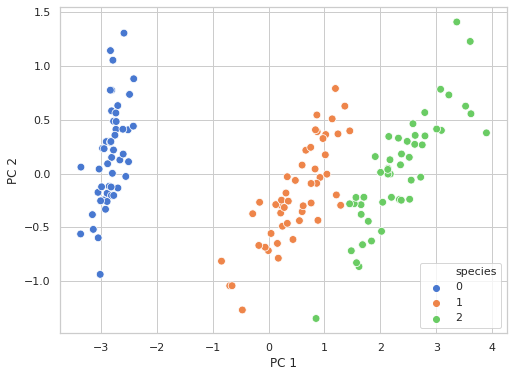

In [ ]:
from sklearn.decomposition import PCA

df_5 = df

# set species to no-cat 
df_5['species'] = df_5['species'].astype('category').cat.codes

# PCA with two components
pca = PCA(n_components = 2)

# Fit the iris-data
pca.fit(df_5)

# preojecting the isis-data
Projection = pca.transform(df_5)

# creat a df
df_pca =  pd.DataFrame(Projection, columns=['PC 1', 'PC 2'])

# add the coloumn 'species'
df_pca['species'] = df_5['species']

# plot
sns.scatterplot(df_pca['PC 1'], 
                df_pca['PC 2'], 
                hue = df_pca['species'], 
                palette = "muted",
                 s = 60)


#### 4.4 **[2pt]** Explain (in English) the relationship between (classic) recommender systems and denoising. Then go one step further: to understand the current state of the art (not covered in the lecture), explain a recommender system in term of _mapping_.

- Modern recommender systems rarely use matrix decomposition approaches. Better results have been obtained modeling the mapping directly with flexible, generic function approximators with high generalization capabilities such as neural networks.

Taking the example of Netflix. In order to recommend a movie to a user, you would need some information about movies the user has already seen and also rated, and you would need data about other users and their ratings. According to this data, one could then reconstruct ratings for other movies, which the user hasn't seen yet. When reconstruciting the data you want to avoid as much noise as possibles thus again you drop "information" correspondign to the noise.

A recommender system, in the example above, maps a movie to a discrete set consisting of "recommended" and "not recommended".

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Clustering is the core of UL. Master $k$-means with this [[tutorial]](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

#### BONUS **[ZERO pt]** Curious about how to implement SVD in Python? Here's a good tutorial: [[link]](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/).

#### BONUS **[ZERO pt]** Over the year, I found that experience in whipping out a quick PCA always pays off. Follow [this tutorial](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/r5_pca.html). Challenge: no copy+paste allowed, type everything, muscle memory is much more effective at retaining experience than passive study. Particularly useful is the discussion at the end: learn that Dimensionality Reduction _hides_ information! It is extremely dangerous to found your decisions on a PCA plot on a subset of axis (e.g. 2), people have lost entire careers on that!

#### BONUS **[ZERO pt]** Study dictionary learning. This scikit-learn page contains explanation, reference to a library algorithm, an example, and even a link to the paper which published the algorithm. [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html).

#### BONUS **[ZERO pt]** Once you have a dictionary, you can learn about Sparse Coding here: [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html).

### Final considerations

- Supervised Learning imply the presence of a _supervisor_ in the data preparation. This is typically either a human (which means limited data, human errors, time constraints, etc.), or (lately more common) another algorithm that is used as an _oracle_. In Deep Reinforcement Learning we will see that the reward function is learned through SL; in Self-Supervised Learning and in Embeddings applications it is an Unsupervised Learning algorithm to provide the oracle.
- All applications of UL stem from two concepts:
    - **Similarity**: similar things are put together, different things are separated.
    - **Information**: data contains redundancy and noise which can be mitigated by studying/extracting global patterns and references.
- Unsupervised Learning is almost always present one way or another in complex applications, yet rarely recognized or credited for what it is -- it's always "embedding", "pre-processing", "cleaning", etc., "UL" is so old school nobody says they're doing it. Learn to recognize when it is used, nonetheless, and the competence you gained today will find more applications than you imagine.